# Basic

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import cv2

import matplotlib.pyplot as plt

tqdm.pandas()

In [2]:
label_path = "/run/media/viper/LSP/Dataset/RAF-DB/basic/EmoLabel/list_patition_label.txt"
df = pd.read_csv(label_path, sep=" ", header=None)
df.columns = ["fr", "label"];

In [20]:
num2label = ["Surprise", "Fear", "Disgust", "Happiness", "Sadness", "Anger", "Neutral"]

In [2]:
def origin_path(row):
    return "/run/media/viper/LSP/Dataset/RAF-DB/basic/Image/original/" + row

def align_path(row):
    return "/run/media/viper/LSP/Dataset/RAF-DB/basic/Image/aligned/" + row.split('.')[0] + '_aligned.' + row.split('.')[1]

def get_hw(row):
    img = cv2.imread(row)
    return f"{img.shape[0]},{img.shape[1]},{img.shape[2]}"

In [4]:
df["aligned_fr"] = df["fr"].progress_apply(align_path)

100%|██████████| 15339/15339 [00:00<00:00, 204480.22it/s]


In [5]:
df["hw"] = df["aligned_fr"].progress_apply(get_hw)

100%|██████████| 15339/15339 [02:11<00:00, 116.67it/s]


In [6]:
target = '100,100,3'
outlier = 0
for i in tqdm(range(len(df))):
    if df.iloc[i]["hw"] != target:
        outlier += 1
print(outlier)

100%|██████████| 15339/15339 [00:01<00:00, 11304.66it/s]

0


In [7]:
X = np.zeros((len(df), 3, 100, 100))

In [8]:
for i in tqdm(range(len(df))):
    img = cv2.imread(df.iloc[i]["aligned_fr"])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.transpose(2, 0, 1)
    X[i,:,:,:] = img

100%|██████████| 15339/15339 [00:14<00:00, 1023.67it/s]


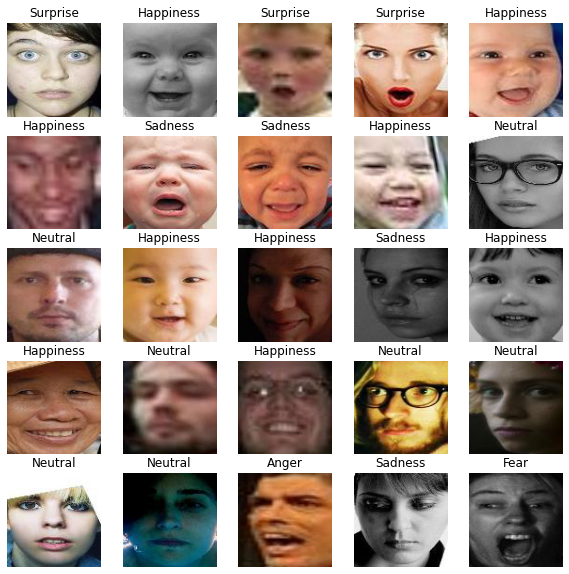

In [29]:
fig, ax = plt.subplots(nrows=5, ncols=5, figsize = (10,10))
img_index = np.random.randint(0, len(df), 25)

index = 0
for row in ax:
    for col in row:
        img = X[img_index[index],:,:,:]
        img = img.transpose(1,2,0)
        col.imshow(img.astype(np.uint8))
        col.axis("off")
        col.set_title(num2label[df["label"][img_index[index]]-1])
        index += 1


In [30]:
np.save("/run/media/viper/LSP/Dataset/IRP_data/RAF_DB/X_basic.npy", X, allow_pickle=True)

In [3]:
Y = pd.get_dummies(df["label"])

In [4]:
Y.head()

,1,2,3,4,5,6,7
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0


In [33]:
Y_np = Y.to_numpy()

In [34]:
np.save("/run/media/viper/LSP/Dataset/IRP_data/RAF_DB/Y_basic.npy", Y, allow_pickle=True)

# Compound

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm

import cv2

import matplotlib.pyplot as plt

tqdm.pandas()

In [29]:
num2label = ["Happily Surprised", "Happily Disgusted", "Sadly Fearful","Sadly Angry", "Sadly Surprised", "Sadly Disgusted", "Fearfully Angry", 
             "Fearfully Surprised", "Angrily Surprised", "Angrily Disgusted", "Disgustedly Surprised"]
compount2basic = [[4, 4], [4, 3], [5, 2], [5, 1], [5, 3], [2, 6], [2, 1], [6,1], [6, 3], [3, 1]]
# num2label = ["Surprise", "Fear", "Disgust", "Happiness", "Sadness", "Anger", "Neutral"]

In [2]:
label_path = "/run/media/viper/LSP/Dataset/RAF-DB/compound/EmoLabel/list_patition_label.txt"
df = pd.read_csv(label_path, sep=" ", header=None)
df.columns = ["fr", "label"];

In [3]:
def origin_path(row):
    return "/run/media/viper/LSP/Dataset/RAF-DB/compound/Image/original/" + row

def align_path(row):
    return "/run/media/viper/LSP/Dataset/RAF-DB/compound/Image/aligned/" + row.split('.')[0] + '_aligned.' + row.split('.')[1]

def get_hw(row):
    img = cv2.imread(row)
    return f"{img.shape[0]},{img.shape[1]},{img.shape[2]}"

In [4]:
df["aligned_fr"] = df["fr"].progress_apply(align_path)

100%|██████████| 3954/3954 [00:00<00:00, 725408.01it/s]


In [5]:
df["hw"] = df["aligned_fr"].progress_apply(get_hw)

100%|██████████| 3954/3954 [00:03<00:00, 1080.32it/s]


In [6]:
target = '100,100,3'
outlier = 0
for i in tqdm(range(len(df))):
    if df.iloc[i]["hw"] != target:
        outlier += 1
print(outlier)

100%|██████████| 3954/3954 [00:00<00:00, 9542.69it/s] 

0


In [8]:
X = np.zeros((len(df), 3, 100, 100))
for i in tqdm(range(len(df))):
    img = cv2.imread(df.iloc[i]["aligned_fr"])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.transpose(2, 0, 1)
    X[i,:,:,:] = img

100%|██████████| 3954/3954 [00:04<00:00, 867.70it/s] 


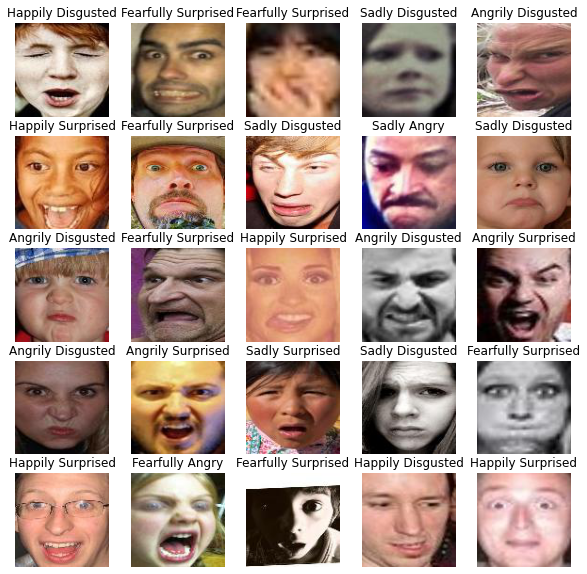

In [11]:
fig, ax = plt.subplots(nrows=5, ncols=5, figsize = (10,10))
img_index = np.random.randint(0, len(df), 25)

index = 0
for row in ax:
    for col in row:
        img = X[img_index[index],:,:,:]
        img = img.transpose(1,2,0)
        col.imshow(img.astype(np.uint8))
        col.axis("off")
        col.set_title(num2label[df["label"][img_index[index]]-1])
        index += 1

In [12]:
np.save("/run/media/viper/LSP/Dataset/IRP_data/RAF_DB/X_compound.npy", X, allow_pickle=True)

In [42]:
Y = np.zeros((len(df), 7))

In [43]:
for i in range(len(df)):
    Y[i][compount2basic[df["label"][i]-1][0]] = 1
    Y[i][compount2basic[df["label"][i]-1][1]] = 1


IndexError: list index out of range

In [47]:
compount2basic[]

IndexError: list index out of range